In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
link = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv'

In [9]:
df = pd.read_csv(link)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df = df.iloc[:,2:]

In [11]:
df.sample(5)

,Age,EstimatedSalary,Purchased
210,48,96000,1
173,34,43000,0
95,35,44000,0
18,46,28000,1
255,52,90000,1


# Train Test split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                df['Purchased'],
                                                test_size=0.3,
                                                random_state=2)

X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)


X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [19]:
scaler.mean_

array([3.77642857e+01, 6.99000000e+04])

In [20]:
X_train.head()

,Age,EstimatedSalary
112,38,61000
209,46,22000
294,35,57000
307,47,113000
345,41,63000


In [23]:
X_train_scaled = pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_transformed,columns=X_test.columns)

In [25]:
X_train_scaled

,Age,EstimatedSalary
0,0.022734,-0.263890
1,0.794317,-1.420262
2,-0.266609,-0.382492
3,0.890765,1.277940
4,0.312078,-0.204589
...,...,...
275,0.794317,1.396542
276,0.987213,-0.856901
277,-1.713327,-1.390612
278,-0.845297,0.299471


In [27]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.8,69900.0
std,10.4,33786.6
min,18.0,15000.0
25%,30.0,43750.0
50%,37.0,70500.0
75%,46.0,87000.0
max,60.0,150000.0


In [28]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


# Effect of Scaling

Text(0.5, 1.0, 'After scaling')

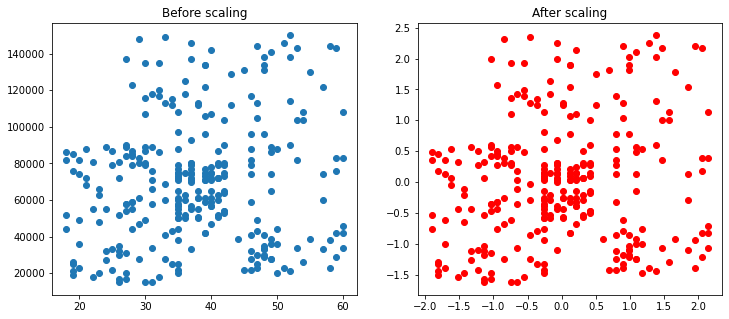

In [32]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After scaling')

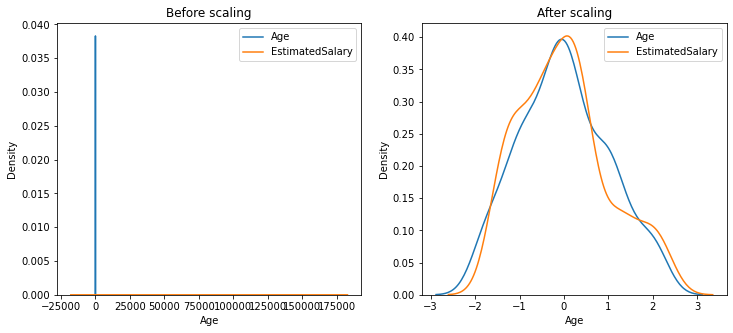

In [41]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax1.legend(['Age','EstimatedSalary'])
ax2.legend(['Age','EstimatedSalary'])

# Comparison of Distributions

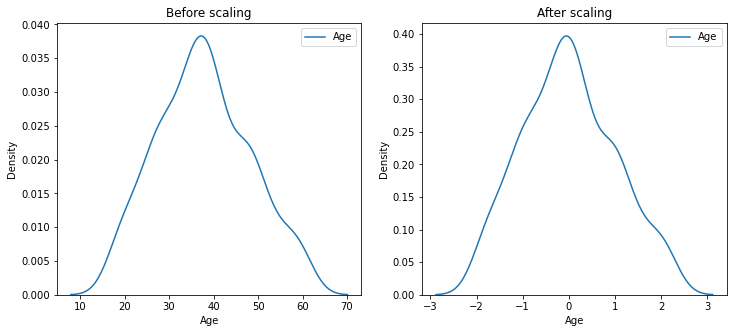

In [50]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
ax1.legend(['Age'])

# after scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
ax2.legend(['Age'])

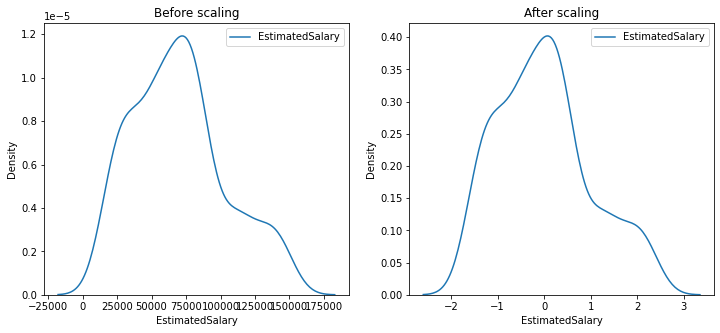

In [51]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.legend(['EstimatedSalary'])

# after scaling
ax2.set_title('After scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.legend(['EstimatedSalary'])

# Why scaling is important ?

In [52]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [61]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [62]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [64]:
from sklearn.metrics import accuracy_score

In [66]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.6416666666666667
Scaled 0.8416666666666667


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [69]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [70]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [71]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.8833333333333333
Scaled 0.875
